In [4]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib.pyplot as plt
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex
#sys.path.append('/noc/users/am8e13/Python/python_functions/')
#from Variable_button import *

In [5]:
# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results36km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
Depth=file2read.variables['Depth']
Depth=Depth[:]*1
Zp1 = file2read.variables['Zp1']
Zp1 = Zp1[:]*1
bathy=file2read.variables['HFacC']
bathy=bathy[:]*1
bathy[bathy==0]=-1
bathy[bathy>0]=0
bathy[bathy==-1]=1

bathy1 = bathy[0,:,:]

In [6]:
x="/scratch/general/am8e13/results2_blownupfull/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("state.nc",'r')
Y=file2read.variables['Y']
Y=Y[:]*1
S_pert=file2read.variables['S']
S_pert=S_pert[:]*1
ETA_pert = file2read.variables['Eta']
ETA_pert = ETA_pert[:]*1
Temp_pert = file2read.variables['Temp']
Temp_pert = Temp_pert[:]*1

#file2read = netcdf.NetCDFFile("RBCS_ss.nc",'r')
#RBCS_SLT=file2read.variables['RBCS_SLT']
#RBCS_SLT=RBCS_SLT[:]*1

x="/scratch/general/am8e13/results2_multitrac36km/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("state.nc",'r')
Y=file2read.variables['Y']
Y=Y[:]*1
S_np=file2read.variables['S']
S_np=S_np[:]*1
V=file2read.variables['V']
V=V[:]*1
U=file2read.variables['U']
U=U[:]*1
ETA_np = file2read.variables['Eta']
ETA_np = ETA_np[:]*1
Temp_np = file2read.variables['Temp']
Temp_np = Temp_np[:]*1
Z=file2read.variables['Z']
Z=Z[:]*1
X=file2read.variables['X']
X=X[:]*1
I=file2read.variables['iter']
I=I[:]*1
days=file2read.variables['T']
days=days[:]*1


dx=36000
t = 60*60*24*360 #seconds in an year

In [7]:
S_np_tot = np.mean(S_np, axis = 0) # average over all times of non perturbed simulation
S_np_tot = np.mean(S_np_tot, axis = 0)

S_pert_tot = np.mean(S_pert, axis = 0) # average over all times of non perturbed simulation
S_pert_tot = np.mean(S_pert_tot, axis = 0)

S_np_top_ave = np.mean(S_np,axis=0)
S_np_top_ave = np.mean(S_np_top_ave[35:45,:,:],axis=0)
S_pert_top = np.mean(S_pert[:,35:45,:,:],axis=1)

ETA_np_tot = np.mean(ETA_np, axis = 0) # average over all times of non perturbed simulation
ETA_pert_tot = np.mean(ETA_pert, axis = 0)

Temp_np_tot = np.mean(Temp_np, axis = 0) # average over all times of non perturbed simulation
Temp_pert_tot = np.mean(Temp_pert, axis = 0)

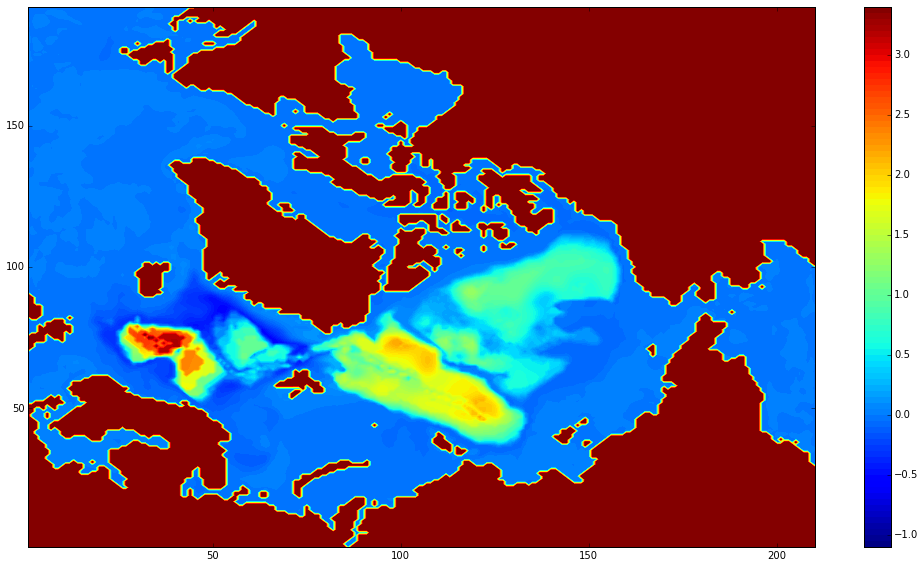

In [8]:
# Overall difference between non restoring run and restoring run
bathyfig = bathy1*(S_pert_tot - S_np_tot).max()
vimin = (S_pert_tot - S_np_tot ).min()
vimax = (S_pert_tot - S_np_tot ).max()
plt.contourf(X,Y,S_pert_tot - S_np_tot + bathyfig,100)
plt.colorbar()
plt.subplots_adjust(right=2.4,top=2)

In [9]:
## Overall average of restoring effect
#bathyfig = bathy1*(RBCS_SLT_tot).max()
#vimin = (RBCS_SLT_tot).min()
#vimax = (RBCS_SLT_tot).max()
#contourf(X,Y,RBCS_SLT_tot + bathyfig,100)
#colorbar()
#ubplots_adjust(right=2.4,top=2)

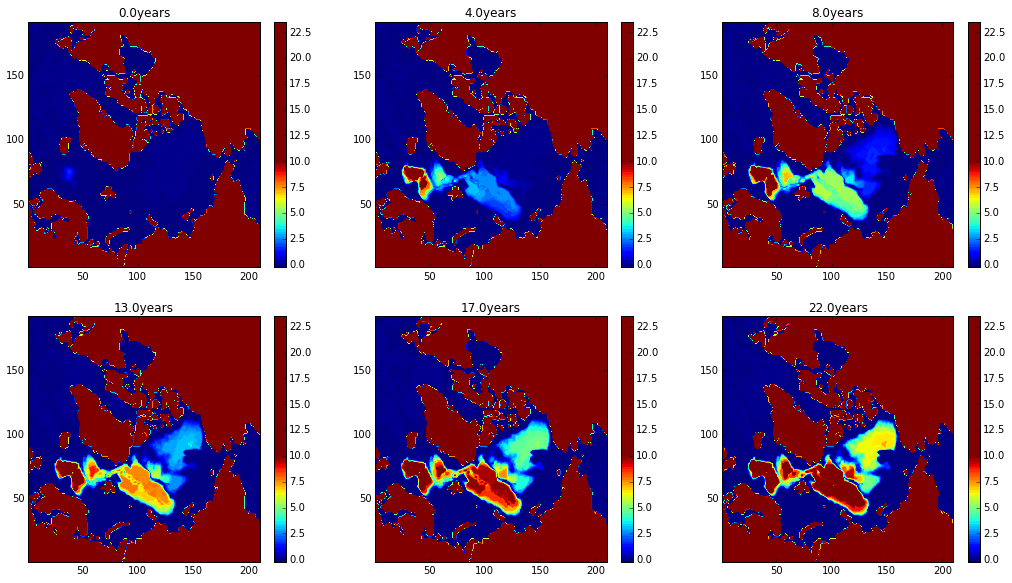

In [10]:
# Salt contentration evolution
fig, axes = plt.subplots(nrows=2, ncols=3)
i=0
bathyfig = bathy1*(S_pert_top - S_np_top_ave).max()

vimin = 0#(S_pert_top - S_np_top_ave).min()
vimax = 10#(S_pert_top - S_np_top_ave).max()
#print levels
for ax in axes.flat:
    cs = ax.contourf(X,Y,S_pert_top[i*40,:,:] - S_np_top_ave + bathyfig,100,vmin=vimin, vmax=vimax )
    fig.colorbar(cs, ax=ax)
    ax.set_title(""+str((days[(i*40)]-days[0])//t) +"years")
    i=i+1
#
fig.subplots_adjust(right=2.4,top=2)

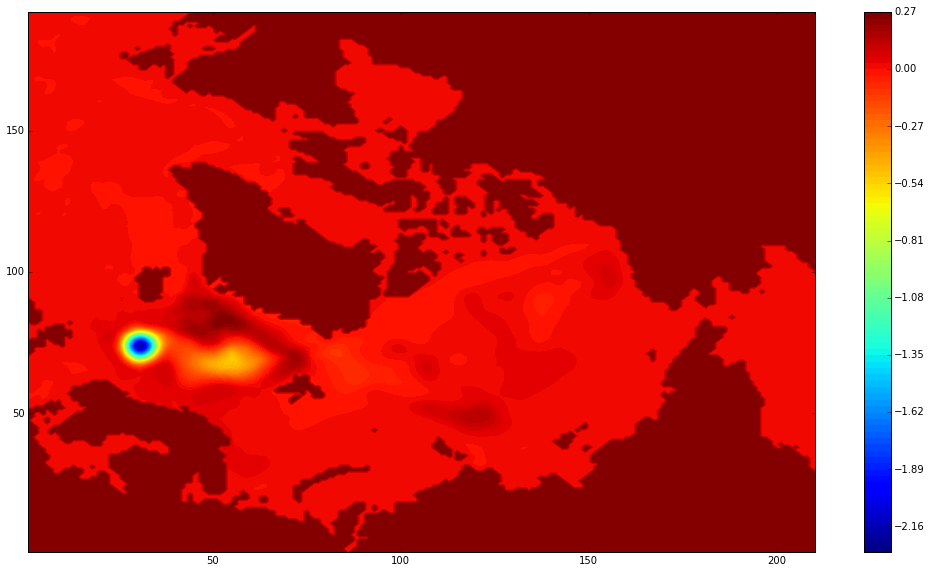

In [11]:
# free-surface_anomaly"
bathyfig = bathy1*(ETA_pert_tot - ETA_np_tot).max()
vimin = (ETA_pert_tot - ETA_np_tot ).min()
vimax = (ETA_pert_tot - ETA_np_tot ).max()
plt.contourf(X,Y,ETA_pert_tot - ETA_np_tot + bathyfig,100)
plt.colorbar()
plt.subplots_adjust(right=2.4,top=2)

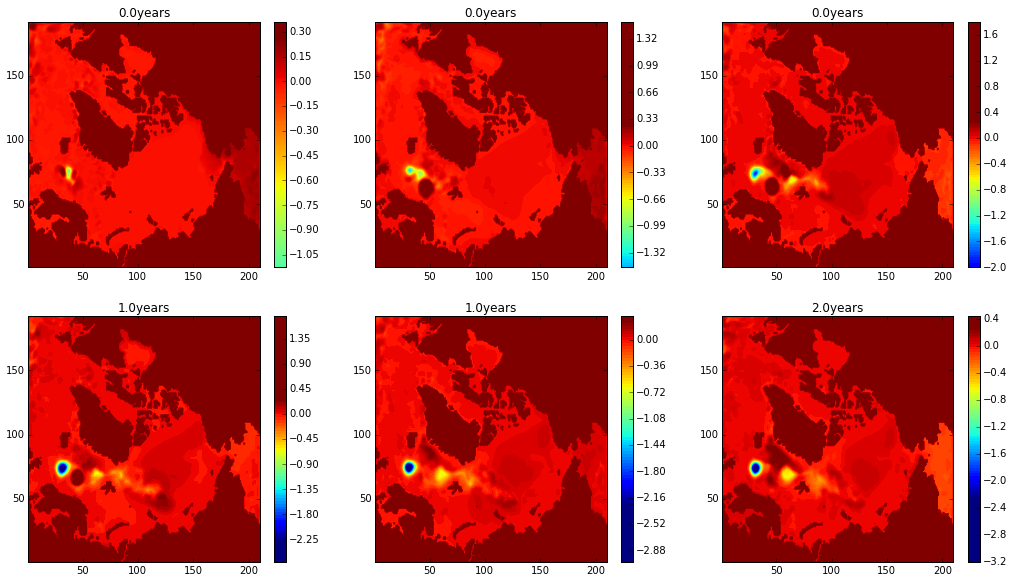

In [12]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=2, ncols=3)
i=0
bathyfig = bathy1*(ETA_pert_tot - ETA_np_tot).max()

vimin = (ETA_pert_tot - ETA_np_tot).min()
vimax = (ETA_pert_tot - ETA_np_tot).max()
#print levels
for ax in axes.flat:
    cs = ax.contourf(X,Y,ETA_pert[i*4,:,:] - ETA_np_tot + bathyfig,100,vmin=vimin, vmax=vimax )
    fig.colorbar(cs, ax=ax)
    ax.set_title(""+str((days[(i*4)]-days[0])//t) +"years")
    i=i+1
#
fig.subplots_adjust(right=2.4,top=2)

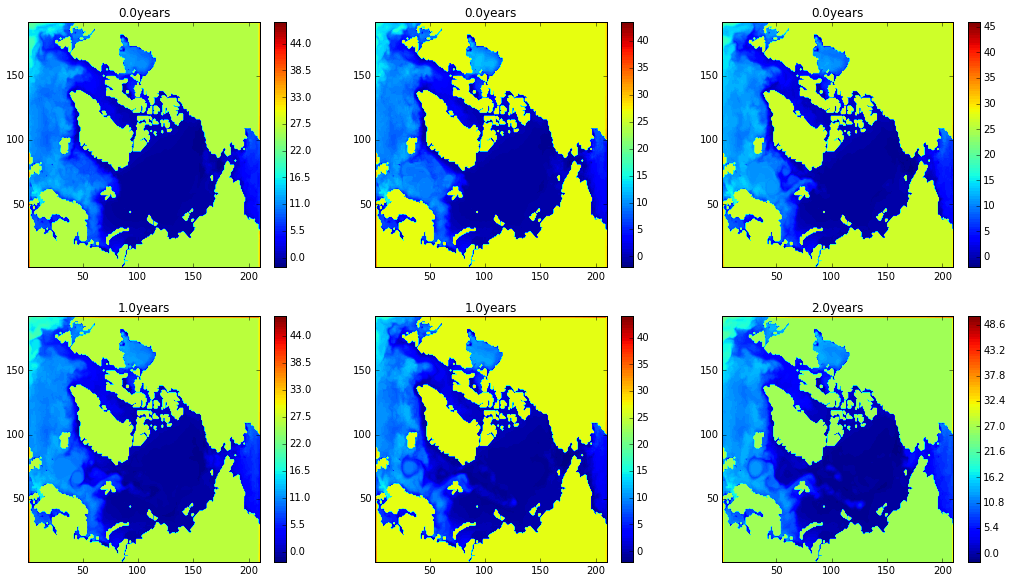

In [13]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=2, ncols=3)
i=0
bathyfig = bathy1*(Temp_pert).max()

vimin = (Temp_pert).min()
vimax = (Temp_pert).max()
#print levels
for ax in axes.flat:
    cs = ax.contourf(X,Y,np.mean(Temp_pert[i*4,0:5,:,:],axis=0) + bathyfig,100)#,vmin=vimin, vmax=vimax 
    fig.colorbar(cs, ax=ax)
    ax.set_title(""+str((days[(i*4)]-days[0])//t) +"years")
    i=i+1
#
fig.subplots_adjust(right=2.4,top=2)

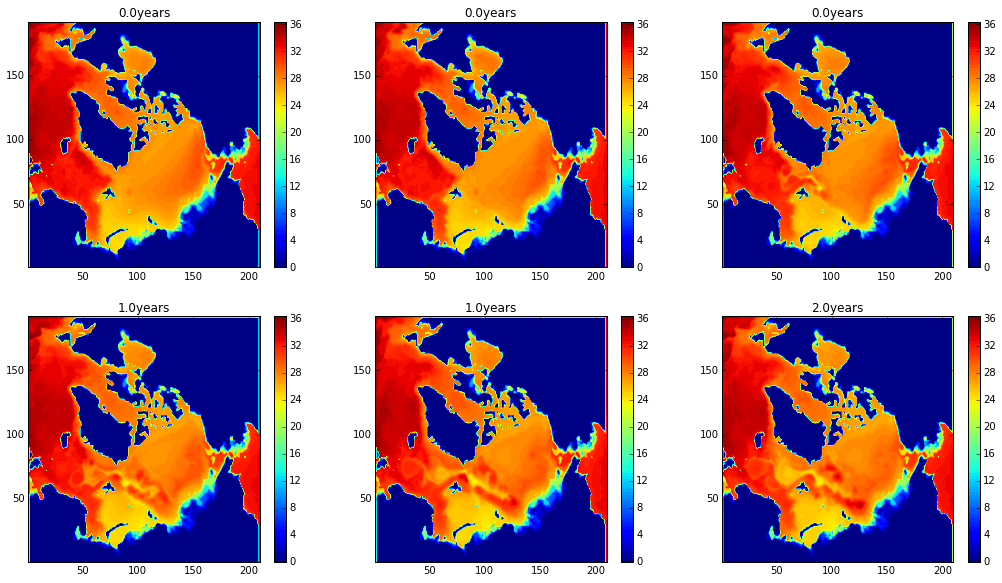

In [14]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=2, ncols=3)
i=0
bathyfig = bathy1*80

vimin = (S_pert).min()
vimax = (S_pert).max()
#print levels
for ax in axes.flat:
    cs = ax.contourf(X,Y,np.mean(S_pert[i*4,0:5,:,:],axis=0),100)#,vmin=vimin, vmax=vimax  + bathyfig
    fig.colorbar(cs, ax=ax)
    ax.set_title(""+str((days[(i*4)]-days[0])//t) +"years")
    i=i+1
#
fig.subplots_adjust(right=2.4,top=2)

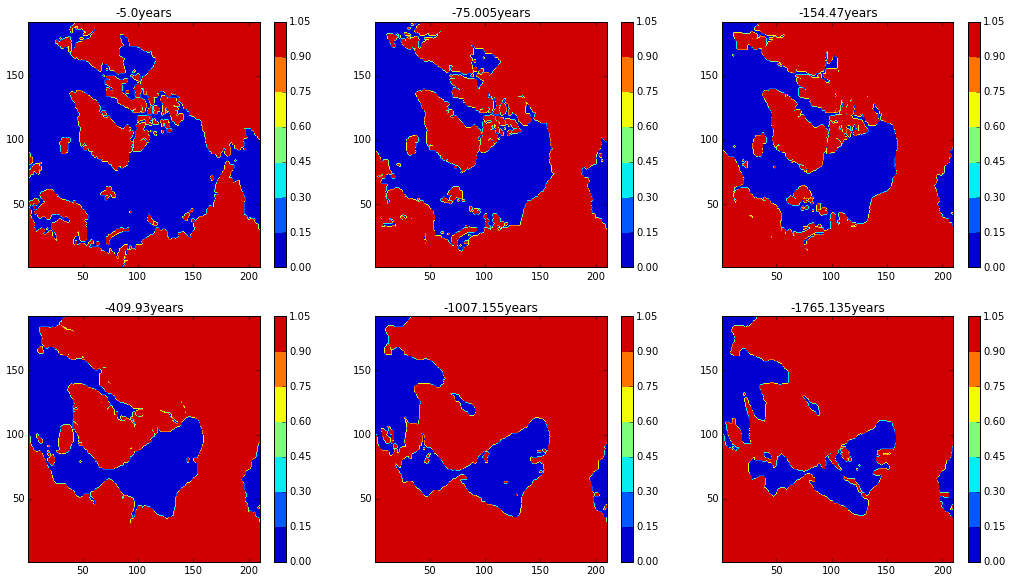

In [15]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=2, ncols=3)
i=0

#print levels
for ax in axes.flat:
    cs = ax.contourf(X,Y,bathy[i*7,:,:])
    fig.colorbar(cs, ax=ax)
    ax.set_title(""+str(Z[i*7]) +"years")
    i=i+1
#
fig.subplots_adjust(right=2.4,top=2)

In [54]:
x="/scratch/general/am8e13/results2_Salt36km/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("state.nc",'r')
S_pert=file2read.variables['S']
S_pert=S_pert[:]*1
days_pert=file2read.variables['T']
days_pert=days[:]*1

x="/scratch/general/am8e13/results2_blownupfull/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("state.nc",'r')
S_blown=file2read.variables['S']
S_blown=S_blown[:]*1
days_blown=file2read.variables['T']
days_blown=days_blown[:]*1

x="/scratch/general/am8e13/results2_multitrac36km/"
os.chdir(x)
file2read = netcdf.NetCDFFile("state.nc",'r')
S_np=file2read.variables['S']
S_np=S_np[:]*1
days_np=file2read.variables['T']
days_np=days_np[:]*1

x="/scratch/general/am8e13/results_restore"
os.chdir(x)
file2read = netcdf.NetCDFFile("state.nc",'r')
S_restore=file2read.variables['S']
S_restore=S_restore[:]*1
days_restore=file2read.variables['T']
days_restore=days_restore[:]*1

dZ = np.zeros(len(Z)-1)
dZ[:] = Z[0:len(Z)-1] - Z[1:len(Z)]
#plot(dZ)



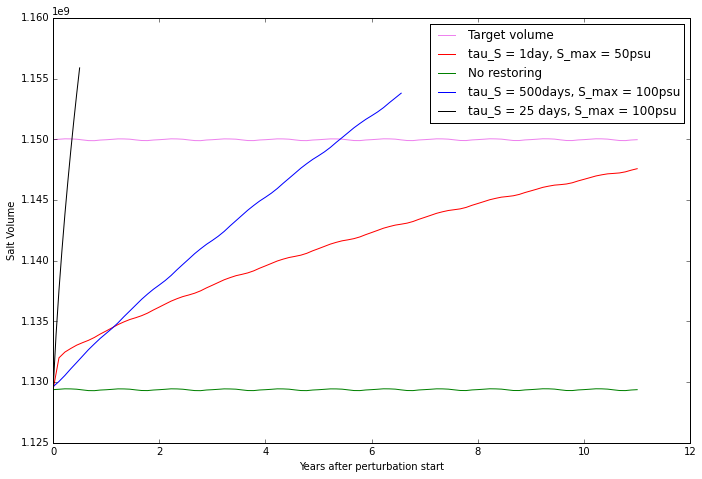

In [87]:
S_pert_quant = np.sum(S_pert, axis=2)
S_pert_quant = np.sum(S_pert_quant, axis=2)
S_pert_quant_a = np.dot(S_pert_quant[:,0:49],dZ)
# S_pert_quant_a total salt volume in m3

S_blown_quant = np.sum(S_blown, axis=2)
S_blown_quant = np.sum(S_blown_quant, axis=2)
S_blown_quant_a = np.dot(S_blown_quant[:,0:49],dZ)

S_np_quant = np.sum(S_np, axis=2)
S_np_quant = np.sum(S_np_quant, axis=2)
S_np_quant_a = np.dot(S_np_quant[:,0:49],dZ)

S_restore_quant = np.sum(S_restore, axis=2)
S_restore_quant = np.sum(S_restore_quant, axis=2)
S_restore_quant_a = np.dot(S_restore_quant[:,0:49],dZ)

S_input = np.array(S_np)
S_input[:,36:44,67:83,34:42,]=100
            
S_input_quant = np.sum(S_input, axis=2)
S_input_quant = np.sum(S_input_quant, axis=2)
S_input_quant_a = np.dot(S_input_quant[:,0:49],dZ)

#plt.plot(S_pert_quant_a,'r--',S_input_quant_a,'b',S_np_quant_a,'g',S_blown_quant_a,'b--',S_restore_quant_a,'g--')
quant, = plt.plot((days_pert[0:100] - days_pert[0])/t,S_input_quant_a[0:100],'violet',label = 'Target volume')
pert, = plt.plot((days_pert[0:100] - days_pert[0])/t,S_pert_quant_a[0:100],'r',label = 'tau_S = 1day, S_max = 50psu')
nprun, = plt.plot((days_np[0:100] - days_np[0])/t,S_np_quant_a[0:100],'g',label = 'No restoring')
blown, = plt.plot((days_blown[0:60] - days_blown[0])/t,S_blown_quant_a[0:60],'b',label = 'tau_S = 500days, S_max = 100psu')
restore, = plt.plot((days_restore[56:66]-391*t)/t,S_restore_quant_a[56:66],'black',label = 'tau_S = 25 days, S_max = 100psu')
#set_title("Salt volume evolution")
plt.xlabel('Years after perturbation start')
plt.ylabel('Salt Volume')
plt.legend(handles=[quant,pert,nprun,blown,restore])#,['Stable Pert','Target volume','Non pert run','Almost stable pert','Unstable run'])
plt.subplots_adjust(right=1.6,top=1.6)

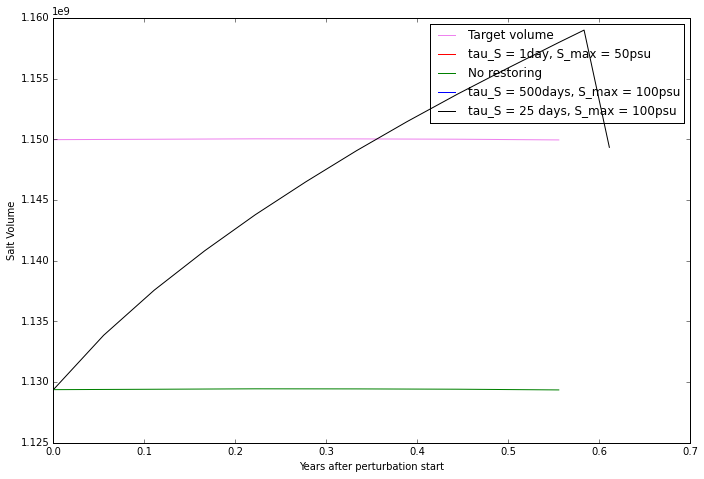

In [94]:
quant, = plt.plot((days_pert[0:6] - days_pert[0])/t,S_input_quant_a[0:6],'violet',label = 'Target volume')
restore, = plt.plot((days_restore[56:69]-391*t)/t,S_restore_quant_a[56:69],'black',label = 'tau_S = 25 days, S_max = 100psu')
nprun, = plt.plot((days_np[0:6] - days_np[0])/t,S_np_quant_a[0:6],'g',label = 'No restoring')
#set_title("Salt volume evolution")
plt.xlabel('Years after perturbation start')
plt.ylabel('Salt Volume')
plt.legend(handles=[quant,pert,nprun,blown,restore])#,['Stable Pert','Target volume','Non pert run','Almost stable pert','Unstable run'])
plt.subplots_adjust(right=1.6,top=1.6)
